In [1]:
import sys
import os

sys.path.append('/Users/mk/repos/inshorts-nlp')
os.getcwd()

'/Users/mk/repos/inshorts-nlp/notebooks'

In [2]:
from app.main.data.sources.news_api_downloader import NewsApiDownloaderContainer

downloader = NewsApiDownloaderContainer.instance


In [3]:
data = downloader.download(100)

[2018-12-21 17:29:32,727] INFO in NewsApiDownloader: Downloading articles for business
[2018-12-21 17:29:34,246] INFO in NewsApiDownloader: Downloading articles for sports
[2018-12-21 17:29:35,700] INFO in NewsApiDownloader: Downloading articles for politics
[2018-12-21 17:29:37,230] INFO in NewsApiDownloader: Downloading articles for technology
[2018-12-21 17:29:38,702] INFO in NewsApiDownloader: Downloading articles for entertainment


In [5]:
# example text processed
from app.main.predicting.text_processing import TextProcessingContainer
import pandas as pd

text_processor = TextProcessingContainer.instance

df = pd.DataFrame(data)

In [6]:
df.content = df.content.map(lambda x: text_processor.preprocess_text(x))

AttributeError: 'NoneType' object has no attribute 'lower'

In [25]:
# WATCHOUT for None types

df = df[df.content.notnull()]

df.content = df.content.map(lambda x: text_processor.preprocess_text(x))

df.content = df.content.map(lambda x: (x.split('[')[0]).trim())

AttributeError: 'str' object has no attribute 'trim'

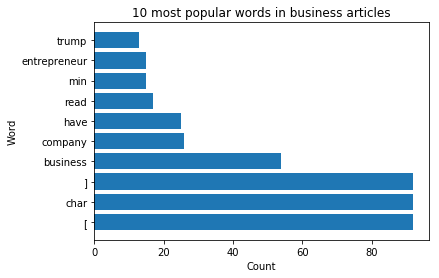

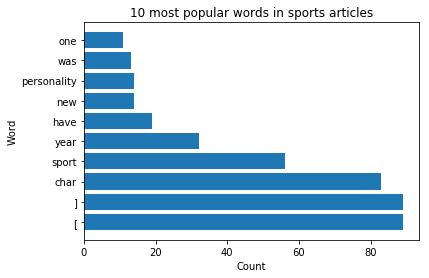

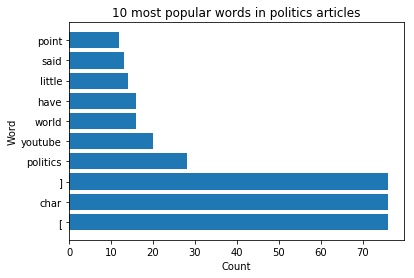

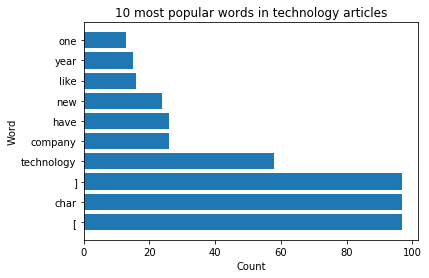

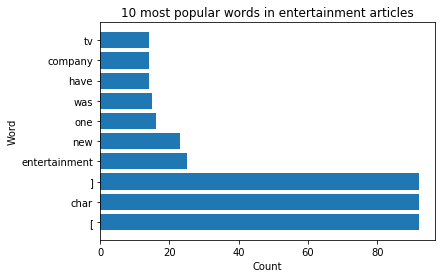

In [23]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

def have_was_filter(word):
    if word == 'ha':
        return 'have'
    elif word == 'wa':
        return 'was'
    else:
        return word

def popular_words(label, n_most_popular):
    articles = df[df.label == label].content.tolist()
    counted = Counter([word for article in articles for word in article.split(' ')])
    sorted_words = sorted(counted.items(), key=lambda kv: kv[1], reverse=True)
    return sorted_words[:n_most_popular]

def popular_words_hist(label, n_most_popular):
    lst = popular_words(label, n_most_popular)
    words = list(map(lambda x: have_was_filter(x[0]), lst))
    counts = list(map(lambda x: x[1], lst))
    plt.barh(words, counts)
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.title('{} most popular words in {} articles'.format(n_most_popular, label))
    plt.show()
    
suggested_categories = ['business', 'sports', 'politics', 'technology', 'entertainment']

for cat in suggested_categories:
    popular_words_hist(cat, 10)